#### About
> Marketing campaign's conversion rate analysis

Dataset - https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

In [49]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance


In [2]:
df_original = pd.read_csv('/home/suraj/ClickUp/Mar-Apr/data/KAG_conversion_data.csv')

In [3]:
df = df_original
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [4]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

#### 1. Data pre-processing.

In [5]:
#drop unneccessary columns
df = df.drop(['ad_id','xyz_campaign_id','fb_campaign_id'], axis=1)

In [6]:
df

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,M,15,7350,1,1.430000,2,1
1,30-34,M,16,17861,2,1.820000,2,0
2,30-34,M,20,693,0,0.000000,1,0
3,30-34,M,28,4259,1,1.250000,1,0
4,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...
1138,45-49,F,109,1129773,252,358.189997,13,2
1139,45-49,F,110,637549,120,173.880003,3,0
1140,45-49,F,111,151531,28,40.289999,2,0
1141,45-49,F,113,790253,135,198.710001,8,2


In [7]:
# Replace any missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [8]:
df

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,M,15,7350,1,1.430000,2,1
1,30-34,M,16,17861,2,1.820000,2,0
2,30-34,M,20,693,0,0.000000,1,0
3,30-34,M,28,4259,1,1.250000,1,0
4,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...
1138,45-49,F,109,1129773,252,358.189997,13,2
1139,45-49,F,110,637549,120,173.880003,3,0
1140,45-49,F,111,151531,28,40.289999,2,0
1141,45-49,F,113,790253,135,198.710001,8,2


In [9]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['age', 'gender'])


In [10]:
df

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,15,7350,1,1.430000,2,1,1,0,0,0,0,1
1,16,17861,2,1.820000,2,0,1,0,0,0,0,1
2,20,693,0,0.000000,1,0,1,0,0,0,0,1
3,28,4259,1,1.250000,1,0,1,0,0,0,0,1
4,28,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,110,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,111,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,113,790253,135,198.710001,8,2,0,0,0,1,1,0


In [12]:
# Normalize the numerical features
numerical_features = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion','interest']
for feature in numerical_features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

df


,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,-0.659184,-0.573542,-0.569323,-0.574520,-0.190839,0.032222,1,0,0,0,0,1
1,-0.622081,-0.539935,-0.551746,-0.570033,-0.190839,-0.543248,1,0,0,0,0,1
2,-0.473670,-0.594826,-0.586901,-0.590974,-0.413874,-0.543248,1,0,0,0,0,1
3,-0.176847,-0.583425,-0.569323,-0.576592,-0.413874,-0.543248,1,0,0,0,0,1
4,-0.176847,-0.583827,-0.569323,-0.576131,-0.413874,0.032222,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2.828481,3.015201,3.842511,3.530490,2.262551,0.607693,0,0,0,1,1,0
1139,2.865584,1.441405,1.522343,1.409752,0.032197,-0.543248,0,0,0,1,1,0
1140,2.902687,-0.112549,-0.094744,-0.127383,-0.190839,-0.543248,0,0,0,1,1,0
1141,2.976892,1.929648,1.785998,1.695455,1.147374,0.607693,0,0,0,1,1,0


#### 2. Feature Engineering

In [13]:
# Compute the click-through rate (CTR)
df['CTR'] = df['Clicks'] / df['Impressions']

In [14]:
df

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,CTR
0,-0.659184,-0.573542,-0.569323,-0.574520,-0.190839,0.032222,1,0,0,0,0,1,0.992645
1,-0.622081,-0.539935,-0.551746,-0.570033,-0.190839,-0.543248,1,0,0,0,0,1,1.021876
2,-0.473670,-0.594826,-0.586901,-0.590974,-0.413874,-0.543248,1,0,0,0,0,1,0.986676
3,-0.176847,-0.583425,-0.569323,-0.576592,-0.413874,-0.543248,1,0,0,0,0,1,0.975831
4,-0.176847,-0.583827,-0.569323,-0.576131,-0.413874,0.032222,1,0,0,0,0,1,0.975157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2.828481,3.015201,3.842511,3.530490,2.262551,0.607693,0,0,0,1,1,0,1.274380
1139,2.865584,1.441405,1.522343,1.409752,0.032197,-0.543248,0,0,0,1,1,0,1.056152
1140,2.902687,-0.112549,-0.094744,-0.127383,-0.190839,-0.543248,0,0,0,1,1,0,0.841798
1141,2.976892,1.929648,1.785998,1.695455,1.147374,0.607693,0,0,0,1,1,0,0.925557


In [15]:
# Compute the cost-per-click (CPC)
df['CPC'] = df['Spent'] / df['Clicks']

# Compute the cost-per-impression (CPI)
df['CPI'] = df['Spent'] / df['Impressions']


In [16]:
df

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,CTR,CPC,CPI
0,-0.659184,-0.573542,-0.569323,-0.574520,-0.190839,0.032222,1,0,0,0,0,1,0.992645,1.009128,1.001706
1,-0.622081,-0.539935,-0.551746,-0.570033,-0.190839,-0.543248,1,0,0,0,0,1,1.021876,1.033143,1.055744
2,-0.473670,-0.594826,-0.586901,-0.590974,-0.413874,-0.543248,1,0,0,0,0,1,0.986676,1.006941,0.993525
3,-0.176847,-0.583425,-0.569323,-0.576592,-0.413874,-0.543248,1,0,0,0,0,1,0.975831,1.012766,0.988288
4,-0.176847,-0.583827,-0.569323,-0.576131,-0.413874,0.032222,1,0,0,0,0,1,0.975157,1.011958,0.986818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2.828481,3.015201,3.842511,3.530490,2.262551,0.607693,0,0,0,1,1,0,1.274380,0.918798,1.170897
1139,2.865584,1.441405,1.522343,1.409752,0.032197,-0.543248,0,0,0,1,1,0,1.056152,0.926041,0.978041
1140,2.902687,-0.112549,-0.094744,-0.127383,-0.190839,-0.543248,0,0,0,1,1,0,0.841798,1.344501,1.131799
1141,2.976892,1.929648,1.785998,1.695455,1.147374,0.607693,0,0,0,1,1,0,0.925557,0.949304,0.878635


#### 3. Exploratory data analysis

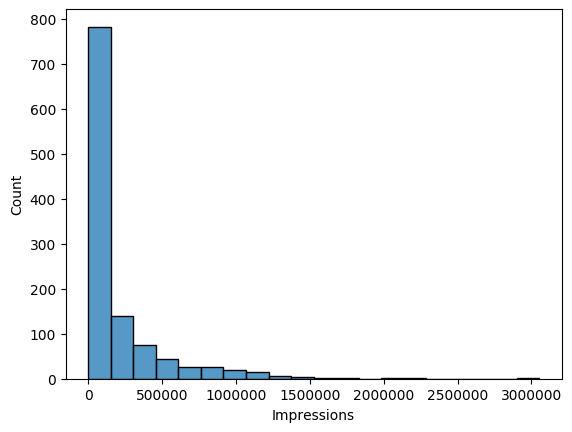

In [23]:
# Explore the distribution of the continuous variables using histograms
sns.histplot(data=df_original, x="Impressions", bins=20)
plt.show()

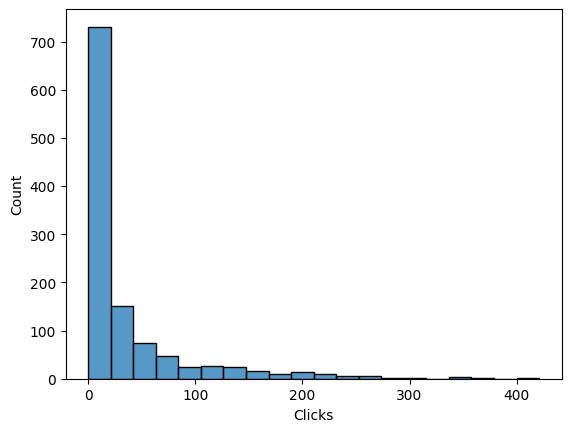

In [24]:
sns.histplot(data=df_original, x="Clicks", bins=20)
plt.show()

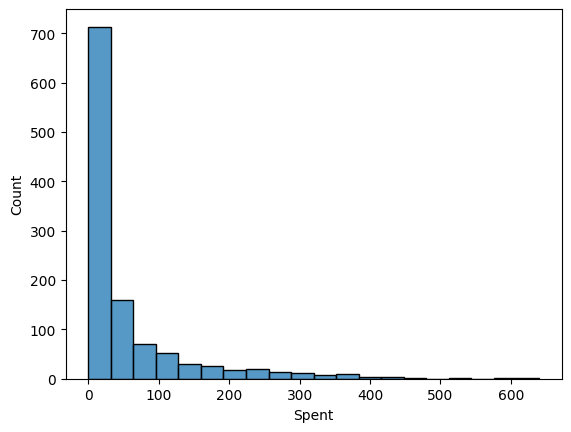

In [25]:
sns.histplot(data=df_original, x="Spent", bins=20)
plt.show()


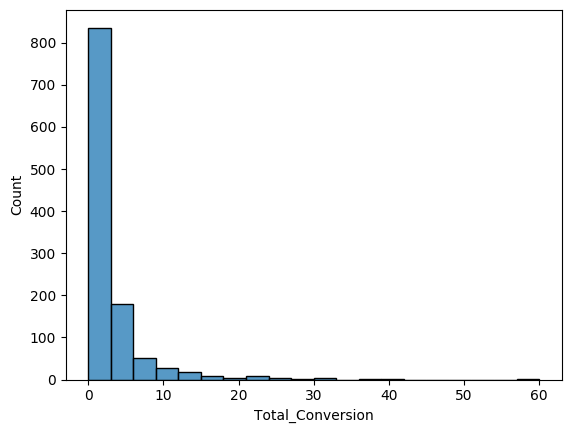

In [26]:
sns.histplot(data=df_original, x="Total_Conversion", bins=20)
plt.show()

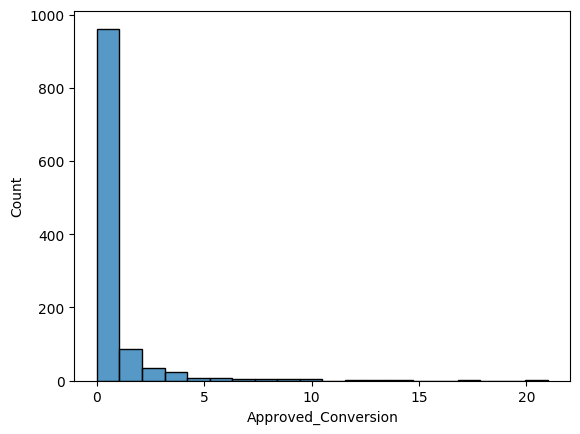

In [27]:
sns.histplot(data=df_original, x="Approved_Conversion", bins=20)
plt.show()

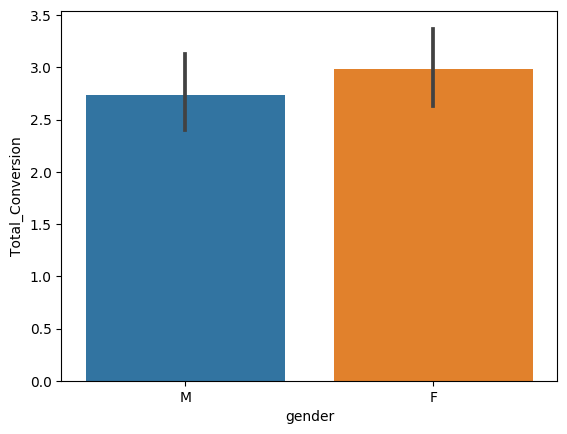

In [28]:
# Explore the relationship between categorical variables and the target variable using bar plots
sns.barplot(data=df_original, x="gender", y="Total_Conversion")
plt.show()


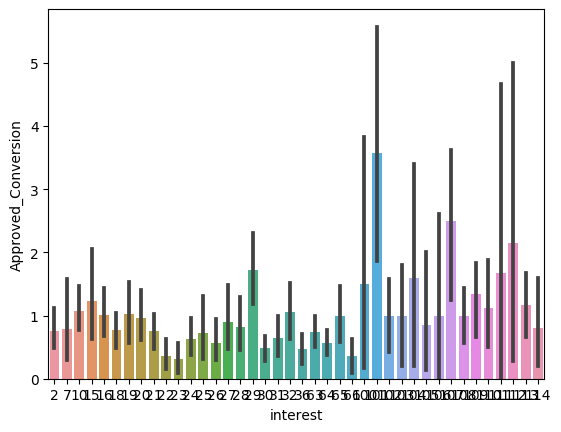

In [29]:
sns.barplot(data=df_original, x="interest", y="Approved_Conversion")
plt.show()

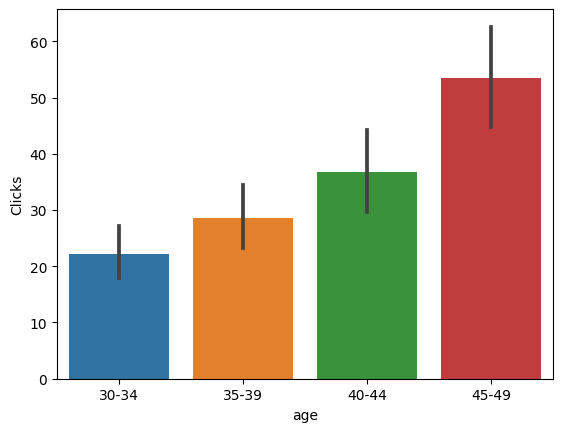

In [30]:
sns.barplot(data=df_original, x="age", y="Clicks")
plt.show()


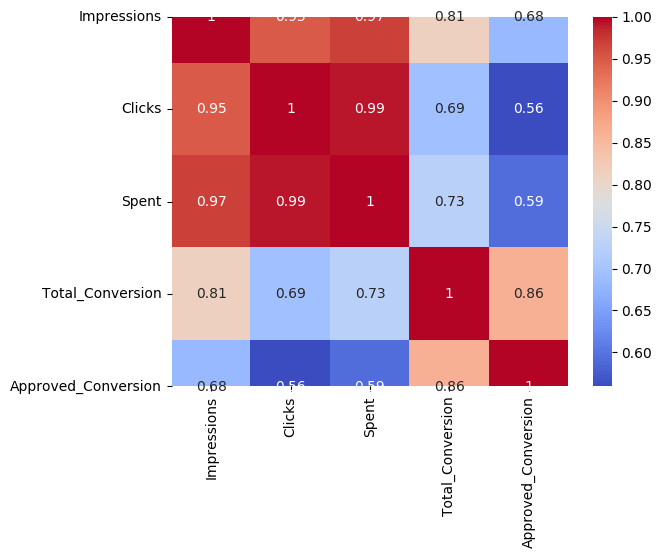

In [32]:
# Explore the correlation between the continuous variables using a heatmap
corr = df_original[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### 4. Model Selection

In [34]:
# Define the features and target variable
X = df.drop(['Total_Conversion', 'Approved_Conversion'], axis=1)
y = df['Approved_Conversion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
y_train

12     -0.543248
758     0.032222
636    -0.543248
1109    0.032222
743     0.032222
          ...   
1044   -0.543248
1095   -0.543248
1130    1.758634
860     6.937870
1126   -0.543248
Name: Approved_Conversion, Length: 914, dtype: float64

In [38]:
# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
nn_model = MLPRegressor(random_state=42)


In [39]:
# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(random_state=42)

In [40]:
# Evaluate the models
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
nn_preds = nn_model.predict(X_test)


In [41]:
print("Linear Regression: ")
print("R^2 score: ", r2_score(y_test, lr_preds))
print("Mean Squared Error: ", mean_squared_error(y_test, lr_preds))
print("Mean Absolute Error: ", mean_absolute_error(y_test, lr_preds))


Linear Regression: 
R^2 score:  0.6573004450377131
Mean Squared Error:  0.3725554777297745
Mean Absolute Error:  0.39825716213328777


In [42]:
print("Decision Tree Regressor: ")
print("R^2 score: ", r2_score(y_test, dt_preds))
print("Mean Squared Error: ", mean_squared_error(y_test, dt_preds))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dt_preds))


Decision Tree Regressor: 
R^2 score:  0.23244533773264853
Mean Squared Error:  0.8344238845486615
Mean Absolute Error:  0.4850036697542849


In [43]:
print("Random Forest Regressor: ")
print("R^2 score: ", r2_score(y_test, rf_preds))
print("Mean Squared Error: ", mean_squared_error(y_test, rf_preds))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_preds))


Random Forest Regressor: 
R^2 score:  0.5524020284871156
Mean Squared Error:  0.48659262521135044
Mean Absolute Error:  0.44243391760072215


In [44]:
print("Neural Network Regressor: ")
print("R^2 score: ", r2_score(y_test, nn_preds))
print("Mean Squared Error: ", mean_squared_error(y_test, nn_preds))
print("Mean Absolute Error: ", mean_absolute_error(y_test, nn_preds))


Neural Network Regressor: 
R^2 score:  0.6290808097402063
Mean Squared Error:  0.4032336025110561
Mean Absolute Error:  0.413694047432631


#### 5. Model tuning

In [46]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

print("Best model: ", best_model)
print("R^2 score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Best model:  RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)
R^2 score:  0.5231074393834783
Mean Squared Error:  0.5184393535784303
Mean Absolute Error:  0.43341142860387954


In [53]:
# Initialize the models
lr_model = LinearRegression(max_iter=1000)
dt_model = DecisionTreeRegressor(max_iter=1000,random_state=42)
mlp_model = MLPRegressor(max_iter=1000,random_state=42)


TypeError: __init__() got an unexpected keyword argument 'max_iter'

In [54]:
# Define the hyperparameter grid to search over for Decision Tree Regressor
dt_param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the hyperparameter grid to search over for MLP Regressor
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd']
}

# Initialize the GridSearchCV objects for Decision Tree Regressor and MLP Regressor
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mlp_grid_search = GridSearchCV(estimator=mlp_model, param_grid=mlp_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the GridSearchCV objects
dt_grid_search.fit(X_train, y_train)
mlp_grid_search.fit(X_train, y_train)

# Get the best models from GridSearchCV
dt_best_model = dt_grid_search.best_estimator_
mlp_best_model = mlp_grid_search.best_estimator_

# Evaluate the best models on the test set
lr_model.fit(X_train, y_train)
dt_y_pred = dt_best_model.predict(X_test)
mlp_y_pred = mlp_best_model.predict(X_test)


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed t

In [55]:
print("Linear Regression R^2 score: ", r2_score(y_test, lr_model.predict(X_test)))
print("Decision Tree Regressor R^2 score: ", r2_score(y_test, dt_y_pred))
print("MLP Regressor R^2 score: ", r2_score(y_test, mlp_y_pred))

print("Decision Tree Regressor Mean Squared Error: ", mean_squared_error(y_test, dt_y_pred))
print("MLP Regressor Mean Squared Error: ", mean_squared_error(y_test, mlp_y_pred))

print("Decision Tree Regressor Mean Absolute Error: ", mean_absolute_error(y_test, dt_y_pred))
print("MLP Regressor Mean Absolute Error: ", mean_absolute_error(y_test, mlp_y_pred))


Linear Regression R^2 score:  0.6573004450377131
Decision Tree Regressor R^2 score:  0.5825262794075556
MLP Regressor R^2 score:  0.6267537946307746
Decision Tree Regressor Mean Squared Error:  0.45384395504120334
MLP Regressor Mean Squared Error:  0.4057633467526968
Decision Tree Regressor Mean Absolute Error:  0.4492109212468428
MLP Regressor Mean Absolute Error:  0.4110040548969615
